step 1- open terminal and run socek 
-> ncat -lk 1234
// 1234 is a port number same neeed to be used in streaming program

simple word count program // stateless

In [ ]:
import org.apache.log4j.{ Level, Logger }
import org.apache.spark.SparkContext
import org.apache.spark.streaming.{ Seconds, StreamingContext }


  Logger.getLogger( "org" ).setLevel( Level.ERROR )

  //val sc = new SparkContext( "local[*]", "pratice_1" ) // already availabe 
  val ssc = new StreamingContext( sc, Seconds( 5 ) )

  val lines = ssc.socketTextStream( "localhost", 1234 )

  // words is a transform Dstream
  val words = lines.flatMap( x => x.split( " " ) )
  val pairs = words.map( x => ( x, 1 ) )
  val wordCounts = pairs.reduceByKey( _ + _ )
  wordCounts.print()
  ssc.start()
  ssc.awaitTermination()


Intitializing Scala interpreter ...

Spark Web UI available at http://LAPTOP-V8NR8FQT:4040
SparkContext available as 'sc' (version = 2.4.4, master = local[*], app id = local-1629963603448)
SparkSession available as 'spark'


-------------------------------------------
Time: 1629963615000 ms
-------------------------------------------
(how,1)
(are,2)
(what,1)
(doing,1)
(you,2)

-------------------------------------------
Time: 1629963620000 ms
-------------------------------------------

-------------------------------------------
Time: 1629963625000 ms
-------------------------------------------
(hello,1)
(heloo,1)

-------------------------------------------
Time: 1629963630000 ms
-------------------------------------------

-------------------------------------------
Time: 1629963635000 ms
-------------------------------------------

-------------------------------------------
Time: 1629963640000 ms
-------------------------------------------

-------------------------------------------
Time: 1629963645000 ms
-------------------------------------------

-------------------------------------------
Time: 1629963650000 ms
-------------------------------------------

-----------------------------------------

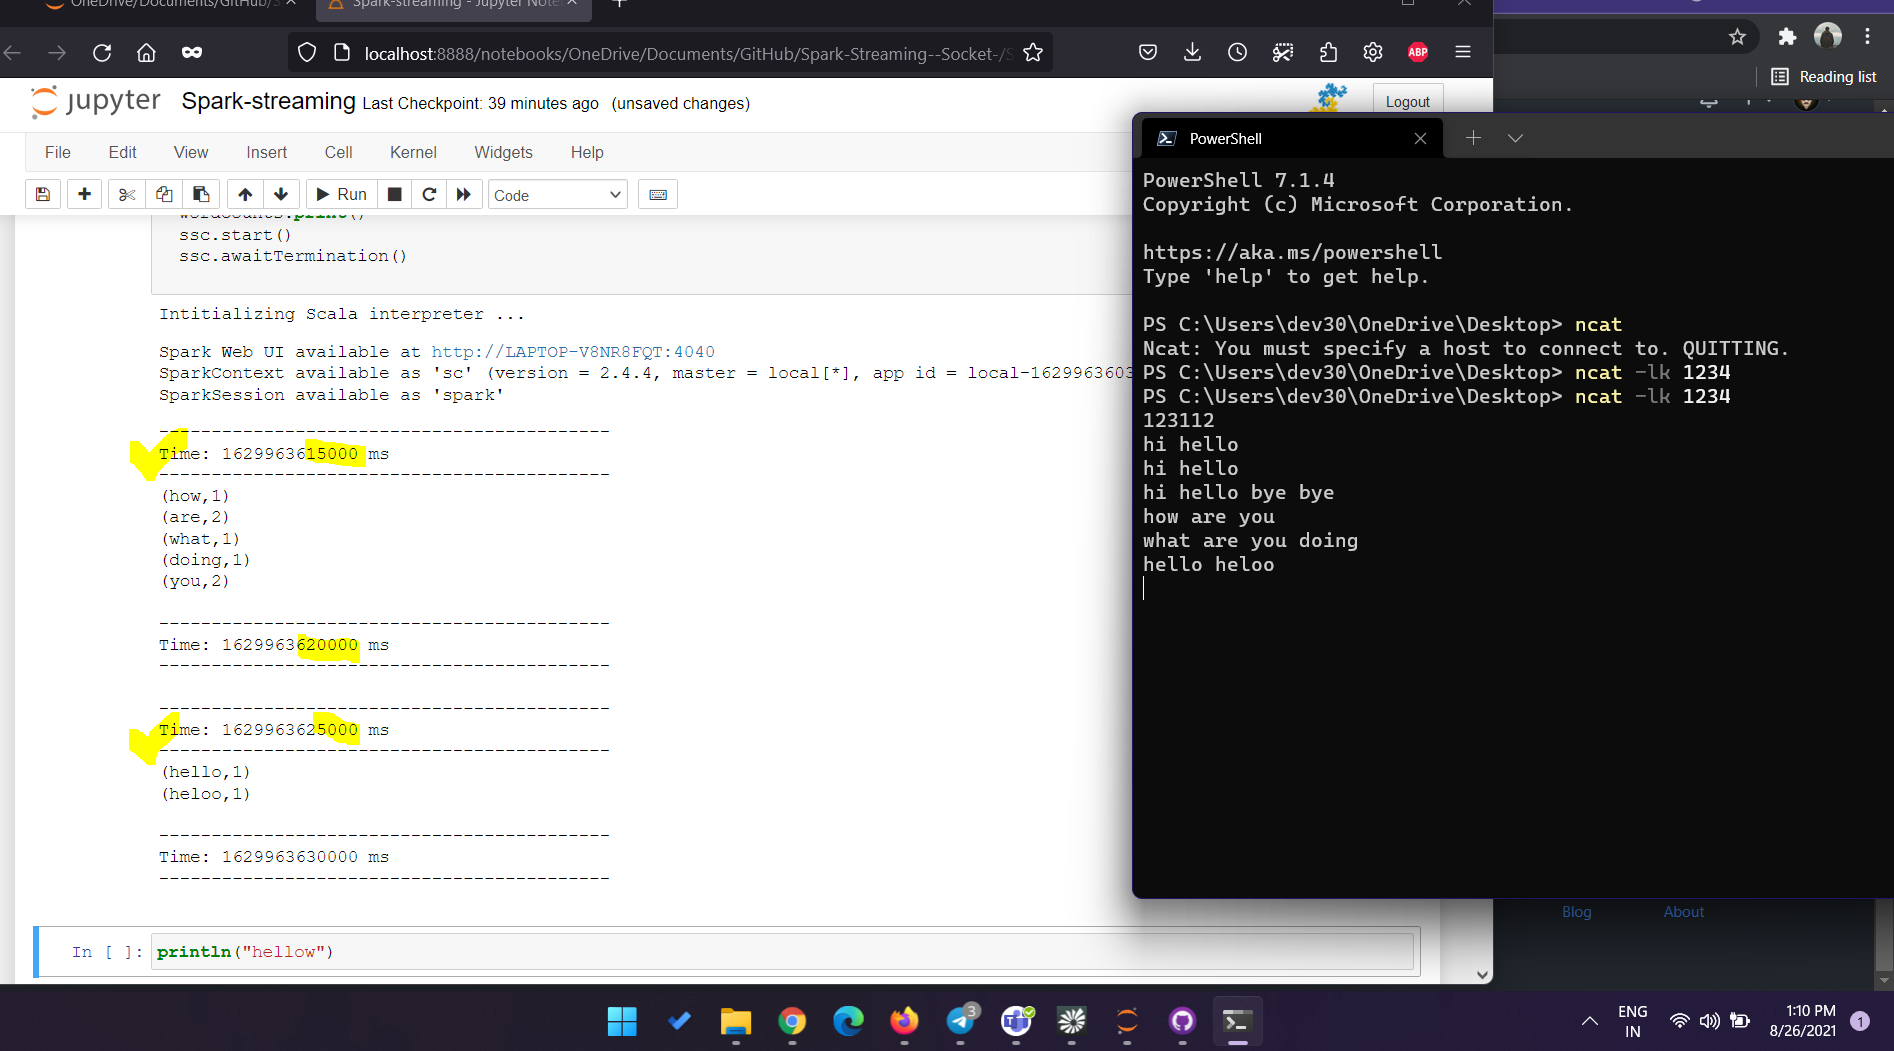

// word count streaming statefull 
// preserving previous results 

In [10]:
import org.apache.log4j.{ Level, Logger }
import org.apache.spark.SparkContext
import org.apache.spark.streaming.{ Seconds, StreamingContext }

  Logger.getLogger( "org" ).setLevel( Level.ERROR )

  //val sc = new SparkContext( "local[*]", "pratice_1" )
  val ssc = new StreamingContext( sc, Seconds( 5 ) )

  val lines = ssc.socketTextStream("localhost",12345 )

  ssc.checkpoint( "check-1" )
  def updateFunc( newValues : Seq[ Int ], previousState : Option[ Int ] ) : Option[ Int ] = {
    val newCount = previousState.getOrElse( 0 ) + newValues.sum
    Some( newCount )
  }

  // words is a transform Dstream
  val words = lines.flatMap( x => x.split( " " ) )
  val pairs = words.map( x => ( x, 1 ) )
  val wordCounts = pairs.updateStateByKey( updateFunc )
  // val wordCounts = pairs.reduceByKey( _ + _ )
  wordCounts.print()
  ssc.start()
  ssc.awaitTermination()



java.net.ConnectException:  Call From LAPTOP-V8NR8FQT/192.168.56.1 to localhost:9000 failed on connection exception: java.net.ConnectException: Connection refused: no further information; For more details see:  http://wiki.apache.org/hadoop/ConnectionRefused

In [ ]:
// using window 

In [13]:
import org.apache.log4j.{ Level, Logger }
import org.apache.spark.SparkContext
import org.apache.spark.streaming.{ Seconds, StreamingContext }

  Logger.getLogger( "org" ).setLevel( Level.ERROR )
  //val sc = new SparkContext( "local[*]", "pratice_1" )
  val ssc = new StreamingContext( sc, Seconds( 2 ) )
  ssc.checkpoint( "." )
  val lines = ssc.socketTextStream( "localhost", 9999 )
  // words is a transform Dstream
  val wordCount = lines.flatMap( x => x.split( " " ) )
    .map( x => ( x, 1 ) )
    .reduceByKeyAndWindow( ( x, y ) => x + y, ( x, y ) => x - y, Seconds( 10 ), Seconds( 4 ) ) //.reduceByKey(_ + _)
    .filter( x => x._2 > 0 )
  wordCount.print()
  ssc.start()
  ssc.awaitTermination()



java.net.ConnectException:  Call From LAPTOP-V8NR8FQT/192.168.56.1 to localhost:9000 failed on connection exception: java.net.ConnectException: Connection refused: no further information; For more details see:  http://wiki.apache.org/hadoop/ConnectionRefused